# Declaration of Originality

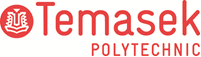

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :   Gini Ong (2400317J)
* Tutorial Group                :   PC04
* Tutor						    :   Emile Sabastian
* Submission Date               :   11/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

# 1. Business Understanding
Goal: predict Positions gained/lost relative to grid position

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
df_races = pd.read_csv('races.csv')
df_results = pd.read_csv('results.csv')
df_drivers = pd.read_csv('drivers.csv')
df_constructors = pd.read_csv('constructors.csv')
df_circuits = pd.read_csv('circuits.csv')
df_qualifying = pd.read_csv('qualifying.csv')

In the dataset, information has been "normalized" to avoid repetition and ensure data integrity.

results.csv is my main table. It records the outcome of every race, but it only uses ID numbers (e.g., driverId: 1, circuitId: 6). It doesn't know that Driver 1 is "Lewis Hamilton" or that Circuit 6 is "Monaco".

The other tables hold the descriptive information. Since machine learning models learn patterns from features like "Constructor = Ferrari" or "Circuit Country = Italy" and not learn patterns from random ID numbers, I merged the 6 tables into 1.

In [3]:
## Merge 1: Add Race Information to Results
df = pd.merge(df_results, df_races, on='raceId', how='left', suffixes=('', '_race'))

## Merge 2: Add Circuit Info
df = pd.merge(df, df_circuits, on='circuitId', how='left', suffixes=('', '_circuit'))

## Merge 3: Add Driver Info
df = pd.merge(df, df_drivers, on='driverId', how='left', suffixes=('', '_driver'))

## Merge 4: Add Constructor (Team) Info
df = pd.merge(df, df_constructors, on='constructorId', how='left', suffixes=('', '_team'))

## Merge 5: Add Qualifying Info
## Rename "position" to "qualifying_pos" to avoid conflict with result "position"
df_qualifying.rename(columns={'position': 'qualifying_pos'}, inplace=True)
## Drop q1, q2, q3 columns as they are not needed
df_qualifying = df_qualifying.drop(columns=['q1', 'q2', 'q3'])
df = pd.merge(df, df_qualifying, on=['raceId', 'driverId'], how='left', suffixes=('', '_qualifying'))

## Rename columns for clarity
df.rename(columns={
    'grid': 'starting_position',
    'positionOrder': 'finishing_position',
    'name': 'gp_name',
    'name_circuit': 'circuit_name',
    'surname': 'driver_surname',
    'name_team': 'constructor_name'
}, inplace=True)

## Drop columns that are not needed for analysis
cols_to_drop = ['url', 'url_driver', 'url_team', 'url_circuit']
df = df.drop(columns=cols_to_drop)

## Display combined dataframe
df

,resultId,raceId,driverId,constructorId,number,starting_position,position,positionText,finishing_position,points,...,driver_surname,dob,nationality,constructorRef,constructor_name,nationality_team,qualifyId,constructorId_qualifying,number_qualifying,qualifying_pos
0,1,18,1,1,22,1,1,1,1,10.0,...,Hamilton,1985-01-07,British,mclaren,McLaren,British,1.0,1.0,22.0,1.0
1,2,18,2,2,3,5,2,2,2,8.0,...,Heidfeld,1977-05-10,German,bmw_sauber,BMW Sauber,German,5.0,2.0,3.0,5.0
2,3,18,3,3,7,7,3,3,3,6.0,...,Rosberg,1985-06-27,German,williams,Williams,British,7.0,3.0,7.0,7.0
3,4,18,4,4,5,11,4,4,4,5.0,...,Alonso,1981-07-29,Spanish,renault,Renault,French,12.0,4.0,5.0,12.0
4,5,18,5,1,23,3,5,5,5,4.0,...,Kovalainen,1981-10-19,Finnish,mclaren,McLaren,British,3.0,1.0,23.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,26760,1144,825,210,20,14,16,16,16,0.0,...,Magnussen,1992-10-05,Danish,haas,Haas F1 Team,American,10546.0,210.0,20.0,15.0
26755,26761,1144,859,215,30,12,17,17,17,0.0,...,Lawson,2002-02-11,New Zealander,rb,RB F1 Team,Italian,10543.0,215.0,30.0,12.0
26756,26762,1144,822,15,77,9,\N,R,18,0.0,...,Bottas,1989-08-28,Finnish,sauber,Sauber,Swiss,10540.0,15.0,77.0,9.0
26757,26763,1144,861,3,43,20,\N,R,19,0.0,...,Colapinto,2003-05-27,Argentinian,williams,Williams,British,10550.0,3.0,43.0,19.0


As shown in the above table, there are values "\N". For this specific dataset, "\N" represents null. Thus, I will be replacing all values of "\N" with NaN.

In [4]:
## Replace '\N' (Kaggle's representation of missing data) with actual NumPy NaN
df.replace(r'\\N', np.nan, regex=True, inplace=True)
df

,resultId,raceId,driverId,constructorId,number,starting_position,position,positionText,finishing_position,points,...,driver_surname,dob,nationality,constructorRef,constructor_name,nationality_team,qualifyId,constructorId_qualifying,number_qualifying,qualifying_pos
0,1,18,1,1,22,1,1,1,1,10.0,...,Hamilton,1985-01-07,British,mclaren,McLaren,British,1.0,1.0,22.0,1.0
1,2,18,2,2,3,5,2,2,2,8.0,...,Heidfeld,1977-05-10,German,bmw_sauber,BMW Sauber,German,5.0,2.0,3.0,5.0
2,3,18,3,3,7,7,3,3,3,6.0,...,Rosberg,1985-06-27,German,williams,Williams,British,7.0,3.0,7.0,7.0
3,4,18,4,4,5,11,4,4,4,5.0,...,Alonso,1981-07-29,Spanish,renault,Renault,French,12.0,4.0,5.0,12.0
4,5,18,5,1,23,3,5,5,5,4.0,...,Kovalainen,1981-10-19,Finnish,mclaren,McLaren,British,3.0,1.0,23.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,26760,1144,825,210,20,14,16,16,16,0.0,...,Magnussen,1992-10-05,Danish,haas,Haas F1 Team,American,10546.0,210.0,20.0,15.0
26755,26761,1144,859,215,30,12,17,17,17,0.0,...,Lawson,2002-02-11,New Zealander,rb,RB F1 Team,Italian,10543.0,215.0,30.0,12.0
26756,26762,1144,822,15,77,9,NaN,R,18,0.0,...,Bottas,1989-08-28,Finnish,sauber,Sauber,Swiss,10540.0,15.0,77.0,9.0
26757,26763,1144,861,3,43,20,NaN,R,19,0.0,...,Colapinto,2003-05-27,Argentinian,williams,Williams,British,10550.0,3.0,43.0,19.0


## 2.2 Summary Statistics

In [5]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   resultId                  26759 non-null  int64  
 1   raceId                    26759 non-null  int64  
 2   driverId                  26759 non-null  int64  
 3   constructorId             26759 non-null  int64  
 4   number                    26753 non-null  object 
 5   starting_position         26759 non-null  int64  
 6   position                  15806 non-null  object 
 7   positionText              26759 non-null  object 
 8   finishing_position        26759 non-null  int64  
 9   points                    26759 non-null  float64
 10  laps                      26759 non-null  int64  
 11  time                      7680 non-null   object 
 12  milliseconds              7680 non-null   object 
 13  fastestLap                8252 non-null   object 
 14  rank  

In [6]:
## Check for missing data
df.isna().sum()

resultId                        0
raceId                          0
driverId                        0
constructorId                   0
number                          6
starting_position               0
position                    10953
positionText                    0
finishing_position              0
points                          0
laps                            0
time                        19079
milliseconds                19079
fastestLap                  18507
rank                        18249
fastestLapTime              18507
fastestLapSpeed             18507
statusId                        0
year                            0
round                           0
circuitId                       0
gp_name                         0
date                            0
time_race                   18469
fp1_date                    24960
fp1_time                    25400
fp2_date                    24960
fp2_time                    25400
fp3_date                    25320
fp3_time      

In [7]:
## Handle missing values

## Columns like 'qualifying_pos' were read as text because of '\N' entries
## I will convert them to numberic (float) to enable calculations
numeric_cols = ['qualifying_pos', 'fastestLap', 'rank', 'number']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

## Qualifying data is often missing for older races
## I assume if qualifying_pos is missing, the 'starting_position' is the best proxy
df['qualifying_pos'] = df['qualifying_pos'].fillna(df['starting_position'])

## columns like fp1_date, fp2_date, fp3_date, and sprint_date are not relevant for analysis
## position is a duplicate of finishing_position
## qualify_id is just a database index
## columns like fastestLap, fastestLapSpeed, and time are only known AFTER the race is finished.
## If I use them to train a model to "predict" the race outcome, we are cheating.
## Therefore, I am dropping these columns.
cols_to_drop_clean = [
    'number', 'position', 'positionText', 'time', 'milliseconds',
    'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed',
    'time_race', 'date', 'fp1_date', 'fp2_date', 'fp3_date', 'fp1_time',
    'fp2_time', 'fp3_time', 'sprint_date', 'sprint_time', 'qualifyId',
    'quali_date', 'quali_time', 'number_driver', 'code', 'constructorId_qualifying',
    'number_qualifying'
]
df = df.drop(columns=cols_to_drop_clean)

## Check for missing data again
df.isna().sum()

resultId              0
raceId                0
driverId              0
constructorId         0
starting_position     0
finishing_position    0
points                0
laps                  0
statusId              0
year                  0
round                 0
circuitId             0
gp_name               0
circuitRef            0
circuit_name          0
location              0
country               0
lat                   0
lng                   0
alt                   0
driverRef             0
forename              0
driver_surname        0
dob                   0
nationality           0
constructorRef        0
constructor_name      0
nationality_team      0
qualifying_pos        0
dtype: int64

In [8]:
## Describe data distribution
df.describe(include="all")

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,statusId,year,...,alt,driverRef,forename,driver_surname,dob,nationality,constructorRef,constructor_name,nationality_team,qualifying_pos
count,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,...,26759.000000,26759,26759,26759,26759,26759,26759,26759,26759,26759.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,861,478,802,843,43,211,211,24,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,alonso,Carlos,Schumacher,1981-07-29,British,ferrari,Ferrari,British,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,404,439,532,404,4559,2439,2439,12248,NaN
mean,13380.977391,551.687283,278.673530,50.180537,11.134796,12.794051,1.987632,46.301768,17.224971,1991.394372,...,276.847416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.195785
std,7726.134642,313.265036,282.703039,61.551498,7.202860,7.665951,4.351209,29.496557,26.026104,19.952885,...,409.086550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.192030
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,...,-7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,6690.500000,300.000000,57.000000,6.000000,5.000000,6.000000,0.000000,23.000000,1.000000,1977.000000,...,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,13380.000000,531.000000,172.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000,1991.000000,...,153.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
75%,20069.500000,811.000000,399.500000,63.000000,17.000000,18.000000,2.000000,66.000000,14.000000,2009.000000,...,401.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [ ]:
## Understanding distribution of target


### 2.3.1.2 Understanding distribution of features

In [ ]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [ ]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection